# Ex1 - Solution

### 1. Describe the Dataset:

#### What are the explanatory variables in the problem? What are the dependent (ex-plained) variables?

The Dependent (Explained) Variable is `lpsa` — which is the logarithm of the PSA level.
It's the target variable that we are trying to predict or explain using the other variables.
Since elevated PSA levels are linked to more severe prostate cancer, this is a key clinical indicator.

The Explanatory (Independent) Variables are `lcavol`, `lweight`, `age`, `lbph`, `svi`, `lcp`, `gleason` and `pgg45`.
These variables are used to help explain or predict lpsa.

#### What are the types of variables (e.g., categorical, continuous, etc.)? How do they behave?

`lpsa`: Continuous, Measures PSA levels on a logarithmic scale;
`lcavol`: Continuous, Log of cancer volume;
`lweight`: Continuous, Log of prostate weight;
`age`: Continuous, Age of the patient;
`lbph`: Continuous, Log of benign prostatic hyperplasia;
`svi`: Binary, Presence of seminal vesicle invasion (0/1);
`lcp`: Continuous, Log of capsular penetration;
`gleason`: Ordinal, Gleason score indicating cancer aggressiveness;
`pgg45`: Continuous, Percentage of past Gleason 4 or 5 scores;

Where:
`Continuous` are Numeric values on a real-valued scale; can take many possible values (e.g., 2.34, 5.0)
`Binary (Categorical)` have only two values (e.g., 0 or 1, True or False).
`Ordinal (Categorical with Order)` are categorical values with a meaningful order or ranking	.

### 2. Dependency Between Explanatory Variables:

#### Do you expect dependence among your explanatory variables?

Yes, we expect some dependence (correlation) among the explanatory variables because in medical data, especially related to cancer progression, many clinical variables are biologically or clinically related.
For example, `lcavol`, `lcp`, `svi` might be correlated as larger tumors (`lcavol`) are more likely to invade the capsule (`lcp`) and spread to seminal vesicles (`svi`).

It is important because if explanatory variables are too strongly correlated, it can make regression models unstable or hard to interpret. (Multicollinearity)
We may need to examine a correlation matrix or Variance Inflation Factors (VIFs) later to detect and address this.

#### Use pairplot to visualize relationships:
```python
import seaborn as sns
sns.pairplot(dataset)
```
where dataset is the matrix of explanatory variables. Consider the variables you
want to display and how (explore the parameters’ hue’ and ’kind’ of the pairplot
function).

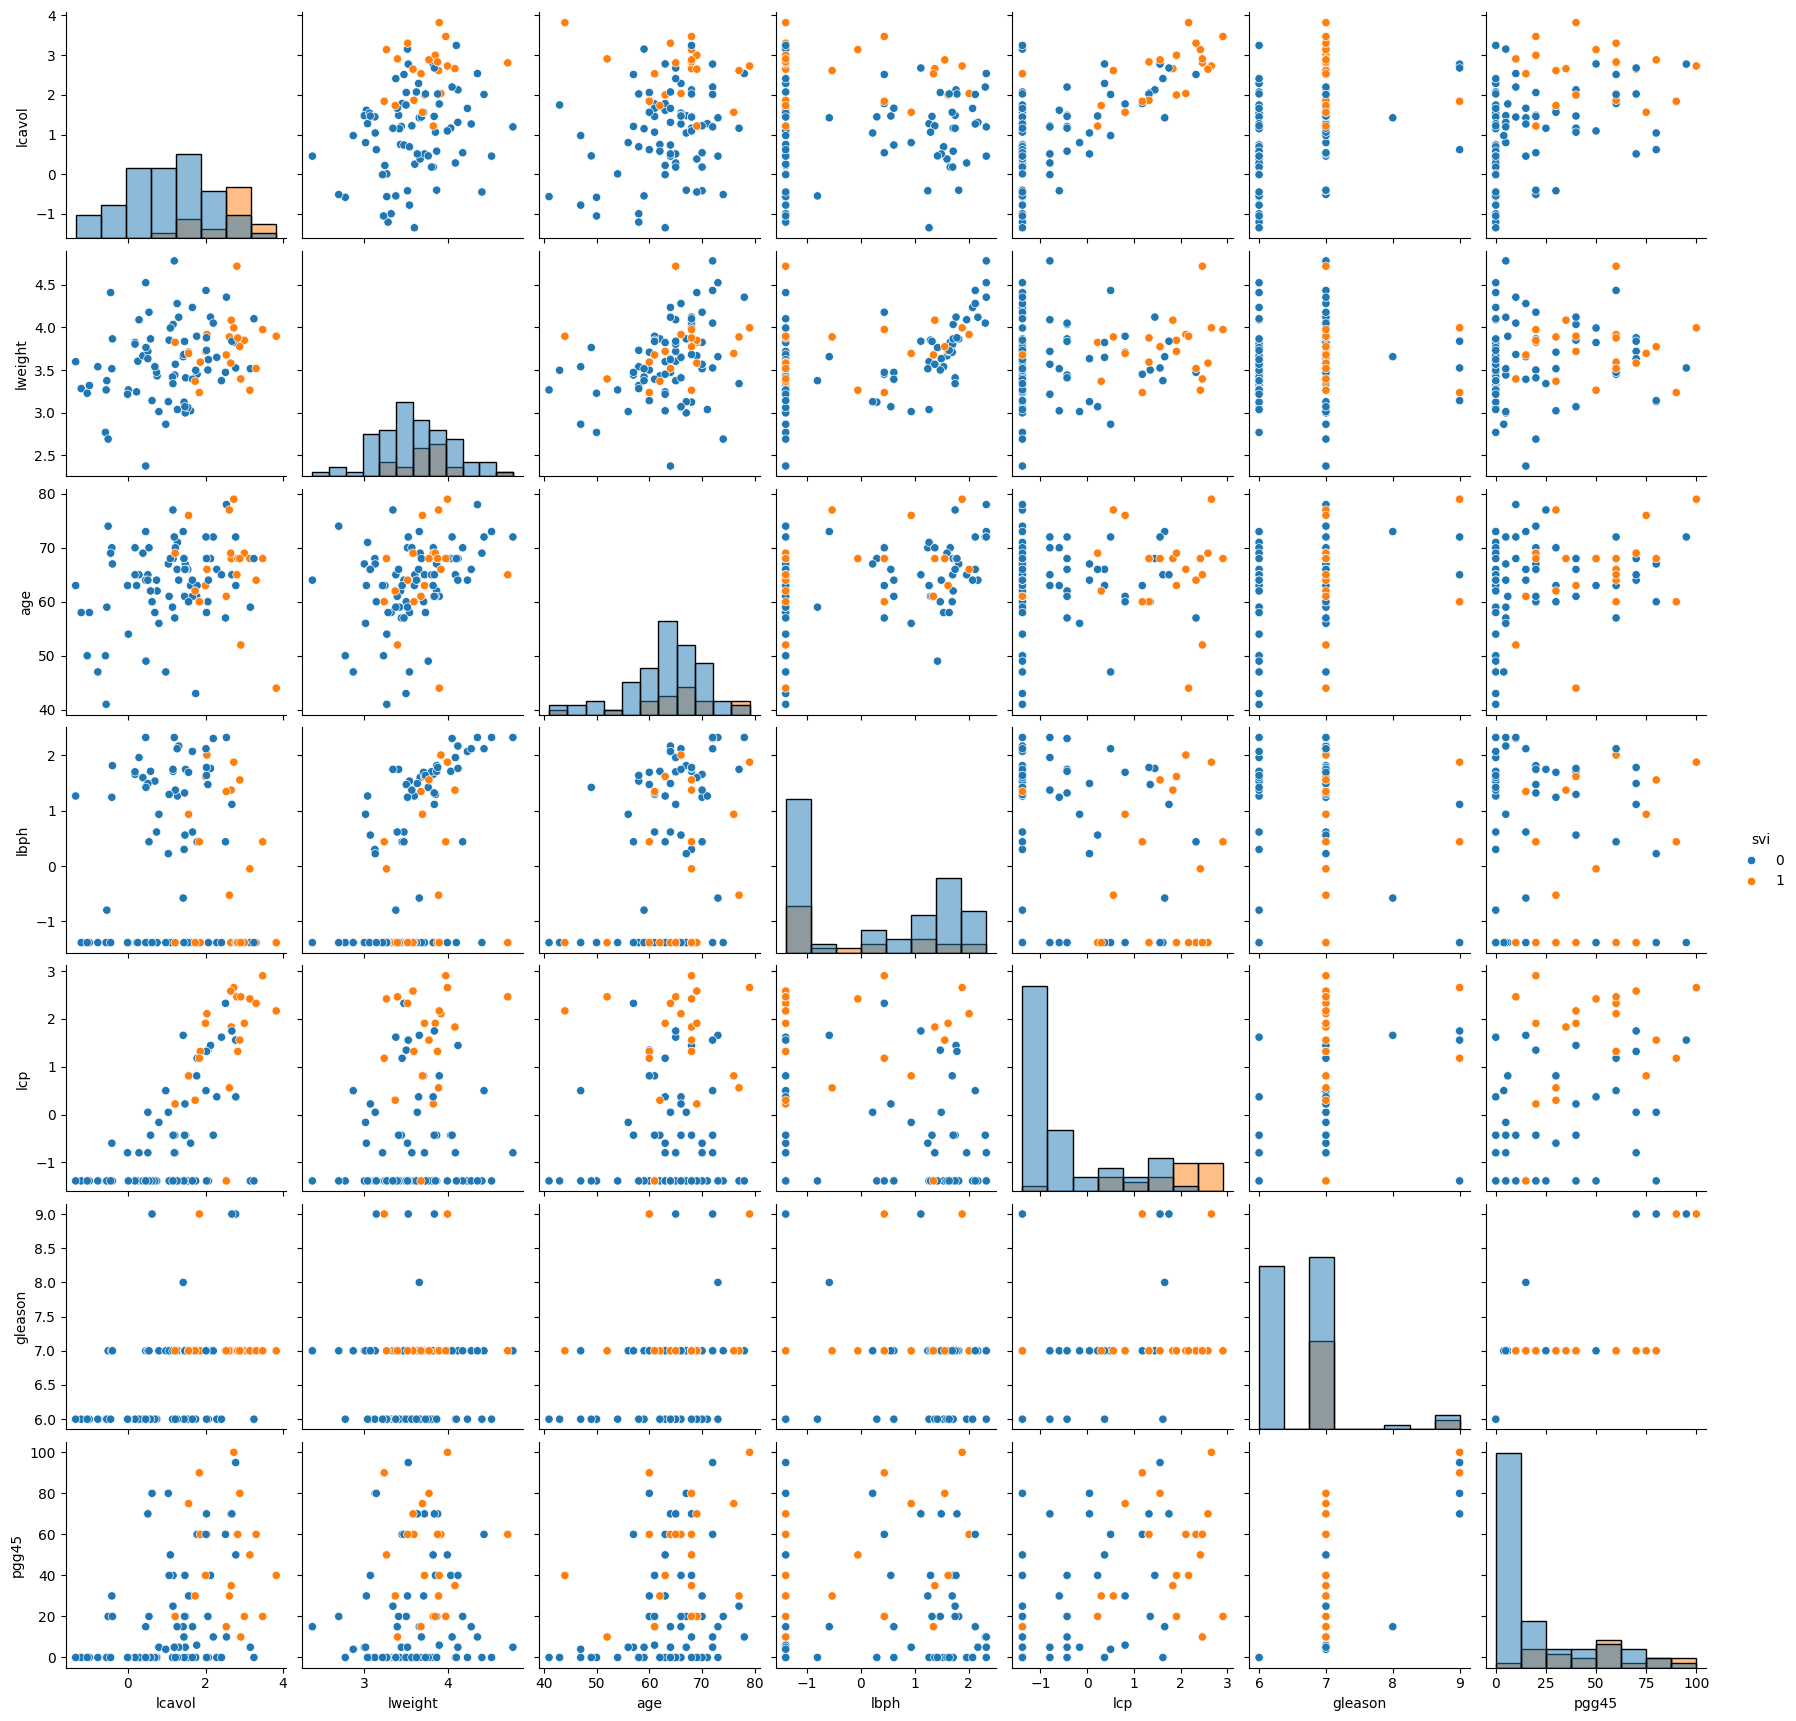

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Data/prostate.csv")

# Define explanatory variables (excluding 'lpsa' and 'train')
explanatory_vars = df.drop(columns=["lpsa", "train"])

# Use pairplot with 'svi' as hue to explore separation between invasion groups
sns.pairplot(explanatory_vars, hue="svi", diag_kind="hist", kind="scatter")
plt.show()

#### Explain what the two-dimensional and one-dimensional panels describe. Discuss whether they help understand variable dependencies.

The One-Dimensional Panels (Diagonal) are the **histograms** of individual variables (like `lcavol`, `lweight`, `age`, etc.).
They show the **distribution** of each variable for the two `svi` groups (colored dots: blue for `svi=0`, orange for `svi=1`).
For example, `lcavol` and `lcp` are skewed right, and you can see that the `svi=1` group tends to have higher values.
It helps to detect **skewness**, **outliers**, or whether the variable separates the groups.

The Two-Dimensional Panels (Off-Diagonal) are the **scatter plots** showing the pairwise relationships between all combinations of variables.
Each panel compares **two variables** and plots how they co-vary.
For example, the panel intersecting `lcavol` and `lcp` shows that as cancer volume increases, capsular penetration tends to increase too.
The color shows `svi`, so you can see if separation occurs between groups.
It helps to visually **identify correlations or dependencies**, to show strong linear or curved patterns that suggest correlation.
It also helps **spot collinearity**—variables that are highly related, like `lcavol` and `lcp`.


#### Describe dependencies between ordinal/categorical variables and the dependent variable.

This cannot be answered from the pairplot because `lpsa` (dependent variable) is not included in it.
Categorical variables (`svi`, `gleason`) aren’t “dimensions” in scatter plots in the same way.
So we make additional plots to examine how `lpsa` changes with `svi` and gleason.

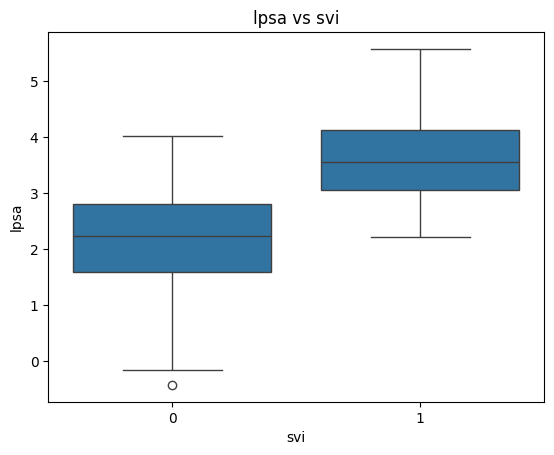

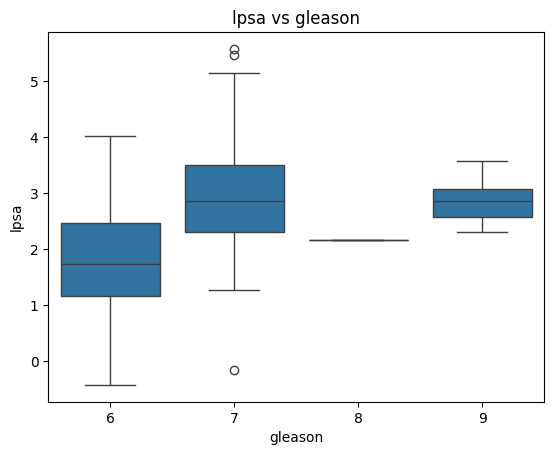

In [26]:
# lpsa vs svi (categorical)
sns.boxplot(x="svi", y="lpsa", data=df)
plt.title("lpsa vs svi")
plt.show()

# lpsa vs gleason (ordinal)
sns.boxplot(x="gleason", y="lpsa", data=df)
plt.title("lpsa vs gleason")
plt.show()


Patients with seminal vesicle invasion (`svi` = 1) tend to have higher PSA levels (`lpsa`) compared to those without invasion (`svi` = 0).
This suggests a positive association between `svi` and `lpsa`.
It aligns with medical expectations — invasion indicates more advanced disease, which is often associated with elevated PSA.

There is a general increasing trend in PSA levels (`lpsa`) with higher Gleason scores.
This suggests that more aggressive cancers (higher Gleason) tend to have higher PSA levels, although the relationship is not perfectly linear and may be influenced by small group sizes (especially for `gleason` = 8).

### 3. Linear Regression Using Statsmodels

#### Use Python’s statsmodels library to perform linear regression. The ’lpsa’ column is the dependent variable, and the remaining are explanatory variables.

In [27]:
import statsmodels.api as sm

# Define dependent and explanatory variables
X = df.drop(columns=["lpsa", "train"])  # Explanatory variables
y = df["lpsa"]                          # Dependent variable

# Add a constant term to the explanatory variables (intercept)
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   lpsa   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     21.68
Date:                Tue, 08 Apr 2025   Prob (F-statistic):           7.65e-18
Time:                        21:27:27   Log-Likelihood:                -98.248
No. Observations:                  97   AIC:                             214.5
Df Residuals:                      88   BIC:                             237.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1816      1.321      0.137      0.8

#### Extract the p-values for all slope coefficients (β values).

In [28]:
# Extract all p-values
p_values = model.pvalues

# Exclude the intercept
slope_p_values = p_values.drop("const")

# Display
print("P-values for slope coefficients:")
print(slope_p_values)

P-values for slope coefficients:
lcavol     6.548216e-09
lweight    2.629310e-03
age        5.848268e-02
lbph       9.847855e-02
svi        2.175634e-03
lcp        2.411505e-01
gleason    7.520677e-01
pgg45      3.099978e-01
dtype: float64


#### Explain the significance of these p-values.

After fitting the linear regression model with `lpsa` as the dependent variable, I extracted the p-values for all the slope coefficients. These p-values test whether each explanatory variable has a statistically significant relationship with `lpsa`, after accounting for the effects of the other variables in the model.
In general, a p-value below 0.05 indicates that the variable is statistically significant — meaning it likely has a real effect on `lpsa`.

**`lcavol`** has a very small p-value (≈ 6.5e-9), which makes it **highly significant**. This suggests that **cancer volume is strongly associated with PSA levels**, and is likely the most important predictor in the model.
**`lweight`** (prostate weight) and **`svi`** (seminal vesicle invasion) also have p-values well below 0.05. This indicates that both are **significantly associated with `lpsa`** when controlling for the other variables.
**`age`** has a p-value of about 0.058, which is just above the 0.05 threshold. This means it's **borderline** — it might have a weak effect, but it’s not statistically significant in this model.
The other variables — **`lbph`, `lcp`, `gleason`, and `pgg45`** — all have p-values above 0.1, meaning they are **not statistically significant** predictors of `lpsa` in the presence of the other variables.

In summary, the variables that significantly contribute to predicting `lpsa` are **`lcavol`, `lweight`, and `svi`**. The rest do not show a significant individual effect once these are accounted for.

### 4. Backward Elimination Using Adjusted $R^2$

#### Apply the Backward Elimination method based on the adjusted $R^2$ metric.

In [29]:
# Track adjusted R² during the process
def backward_elimination(X, y):
    current_vars = list(X.columns)
    best_adj_r2 = -float("inf")
    changed = True

    while changed:
        changed = False
        model = sm.OLS(y, X[current_vars]).fit()
        best_adj_r2 = model.rsquared_adj
        worst_var = None
        worst_r2 = best_adj_r2

        for var in current_vars:
            if var == "const":
                continue
            temp_vars = current_vars.copy()
            temp_vars.remove(var)
            temp_model = sm.OLS(y, X[temp_vars]).fit()
            temp_adj_r2 = temp_model.rsquared_adj

            if temp_adj_r2 > worst_r2:
                worst_r2 = temp_adj_r2
                worst_var = var

        if worst_var:
            current_vars.remove(worst_var)
            changed = True
            print(f"Removed '{worst_var}' | New Adjusted R²: {worst_r2:.5f}")

    final_model = sm.OLS(y, X[current_vars]).fit()
    return final_model

# Run backward elimination
final_model = backward_elimination(X, y)

# Show final model summary
print(final_model.summary())

Removed 'gleason' | New Adjusted R²: 0.63650
                            OLS Regression Results                            
Dep. Variable:                   lpsa   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     25.01
Date:                Tue, 08 Apr 2025   Prob (F-statistic):           1.54e-18
Time:                        21:27:27   Log-Likelihood:                -98.303
No. Observations:                  97   AIC:                             212.6
Df Residuals:                      89   BIC:                             233.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const  

#### Identify which columns are retained and explain why.

In [30]:
print(final_model.model.exog_names)

['const', 'lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'pgg45']


#### Generate a single plot displaying all eliminated variables against the dependent variable and interpret it.

Eliminated variables: ['gleason']


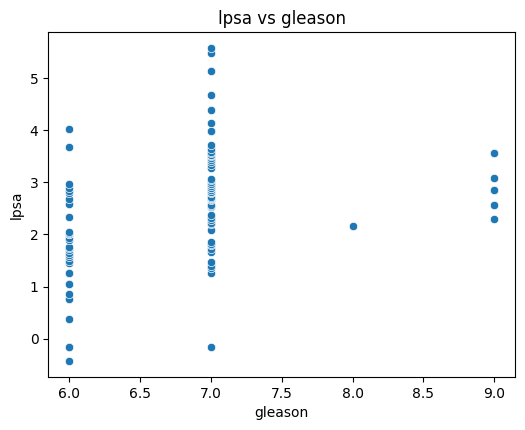

In [31]:
# All original explanatory variables (excluding lpsa and train)
all_vars = list(df.drop(columns=["lpsa", "train"]).columns)

# Variables retained after backward elimination
retained_vars = final_model.model.exog_names  # includes 'const'
retained_vars = [var for var in retained_vars if var != "const"]

# Eliminated = all - retained
eliminated_vars = [var for var in all_vars if var not in retained_vars]

print("Eliminated variables:", eliminated_vars)

# Set up the figure
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

# Plot each eliminated variable against lpsa
for i, var in enumerate(eliminated_vars):
    sns.scatterplot(x=df[var], y=df['lpsa'], ax=axes[i])
    axes[i].set_title(f'lpsa vs {var}')

# Hide any unused subplots
for j in range(len(eliminated_vars), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()